In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import backtrader as bt
import yfinance as yf

In [3]:
class PivotPoint1(bt.Indicator):
    lines = ('p', 's1', 's2', 'r1', 'r2',)

    def __init__(self):
        h = self.data.high(-1)  # previous high
        l = self.data.low(-1)  # previous low
        c = self.data.close(-1)  # previous close

        self.lines.p = p = (h + l + c) / 3.0

        p2 = p * 2.0
        self.lines.s1 = p2 - h  # (p x 2) - high
        self.lines.r1 = p2 - l  # (p x 2) - low

        hilo = h - l
        self.lines.s2 = p - hilo  # p - (high - low)
        self.lines.r2 = p + hilo  # p + (high - low)


class PivotPoint(bt.Indicator):
    lines = ('p', 's1', 's2', 'r1', 'r2',)
    plotinfo = dict(subplot=False)

    def __init__(self):
        h = self.data.high  # current high
        l = self.data.low  # current high
        c = self.data.close  # current high

        self.lines.p = p = (h + l + c) / 3.0

        p2 = p * 2.0
        self.lines.s1 = p2 - h  # (p x 2) - high
        self.lines.r1 = p2 - l  # (p x 2) - low

        hilo = h - l
        self.lines.s2 = p - hilo  # p - (high - low)
        self.lines.r2 = p + hilo  # p + (high - low)

class St(bt.Strategy):
    params = (('usepp1', True),
              ('plot_on_daily', True))

    def __init__(self):
        if self.p.usepp1:
            self.pp = PivotPoint1(self.data1)
        else:
            self.pp = PivotPoint(self.data1)

        if self.p.plot_on_daily:
            self.pp.plotinfo.plotmaster = self.data0

    def next(self):
        txt = ','.join(
            ['%04d' % len(self),
             '%04d' % len(self.data0),
             '%04d' % len(self.data1),
             self.data.datetime.date(0).isoformat(),
             '%.2f' % self.pp[0]])

        print(txt)


cerebro = bt.Cerebro()
cerebro.addstrategy(St)

# Download historical data from Yahoo finance using yfinance
data_df = yf.download('AAPL', start='2018-01-01', end='2023-12-31')

# Use PandasData to feed the DataFrame to Backtrader
data = bt.feeds.PandasData(dataname=data_df)
cerebro.resampledata(data, timeframe=bt.TimeFrame.Months)

# Add the data feed to Cerebro
cerebro.adddata(data)

# Set cash
cerebro.broker.setcash(100000.0)

# Run the strategy
cerebro.run()


[*********************100%***********************]  1 of 1 completed
0001,0002,0002,2018-02-28,nan
0002,0004,0004,2018-04-30,43.02
0003,0006,0006,2018-06-29,45.21
0004,0008,0008,2018-08-31,47.47
0005,0010,0010,2018-10-31,55.89
0006,0012,0012,2018-12-31,47.60
0007,0014,0014,2019-02-28,39.79
0008,0016,0016,2019-04-30,46.43
0009,0018,0018,2019-06-28,47.11
0010,0020,0020,2019-08-30,52.73
0011,0022,0022,2019-10-31,54.55
0012,0024,0024,2019-12-31,65.37
0013,0026,0026,2020-02-28,77.51
0014,0028,0028,2020-04-30,64.24
0015,0030,0030,2020-06-30,77.34
0016,0032,0032,2020-08-31,100.61
0017,0034,0034,2020-10-30,118.96
0018,0036,0036,2020-12-31,116.12
0019,0038,0038,2021-02-26,134.48
0020,0040,0040,2021-04-30,122.36
0021,0042,0042,2021-06-30,126.98
0022,0044,0044,2021-08-31,143.87
0023,0046,0046,2021-10-29,146.68
0024,0048,0048,2021-12-31,159.49
0025,0050,0050,2022-02-28,170.81
0026,0052,0052,2022-04-29,168.11
0027,0054,0054,2022-06-30,149.31
0028,0056,0056,2022-08-31,153.93
0029,0058,0058,2022-10-3

<IPython.core.display.Javascript object>

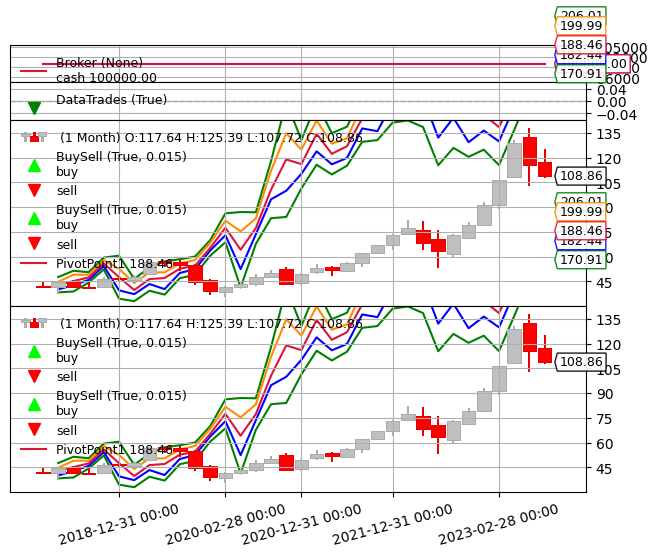

In [4]:
%matplotlib inline
cerebro.plot(style='candlestick', volume=False)[0][0]